## Week 2: Geospatial Data Analysis and GeoPandas

Feb 6, 2019

## Housekeeping

- Homework #2 due next week
- Choose a dataset to 
    - [OpenDataPhilly](https://opendataphilly.org) or one your choosing
    - Email me if you want to analyze one that's not on OpenDataPhilly

## Today's Agenda

- Vector data and introduction to GeoPandas
- Spatial relationships and joins
- Demo: 311 requests by neighborhood in Philadelphia
- Exercise: property assessments by neighborhood

## A few things before we start...

## A good pandas reference

[The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

- Chapter 2: Numpy
- Chapter 3: Pandas
- Chapter 4: matplotlib

## Importing seaborn as sns

In [64]:
import seaborn as sns

West Wing: Sam Norman Seaborn 

[StackOverflow](https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns)

## Getting all of the current variables

In [2]:
import pandas as pd
import numpy as np

In [3]:
x = np.ones(10)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
y = x.sum()

In [5]:
%whos

Variable   Type       Data/Info
-------------------------------
np         module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd         module     <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
sns        module     <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
x          ndarray    10: 10 elems, type `float64`, 80 bytes
y          float64    10.0


## Now, on to geospatial analysis...

## Vector Data


- **vector** refers to **discrete geometric entities**
- The [Open Geospatial Consortium](https://en.wikipedia.org/wiki/Open_Geospatial_Consortium) has standardized a set of [**simple features**](https://en.wikipedia.org/wiki/Simple_Features)
- Includes points, lines, and polygons

<center>
    <img src=attachment:points-lines-polygons-vector-data-types.png width=600></img>
</center>

[Source](https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/)
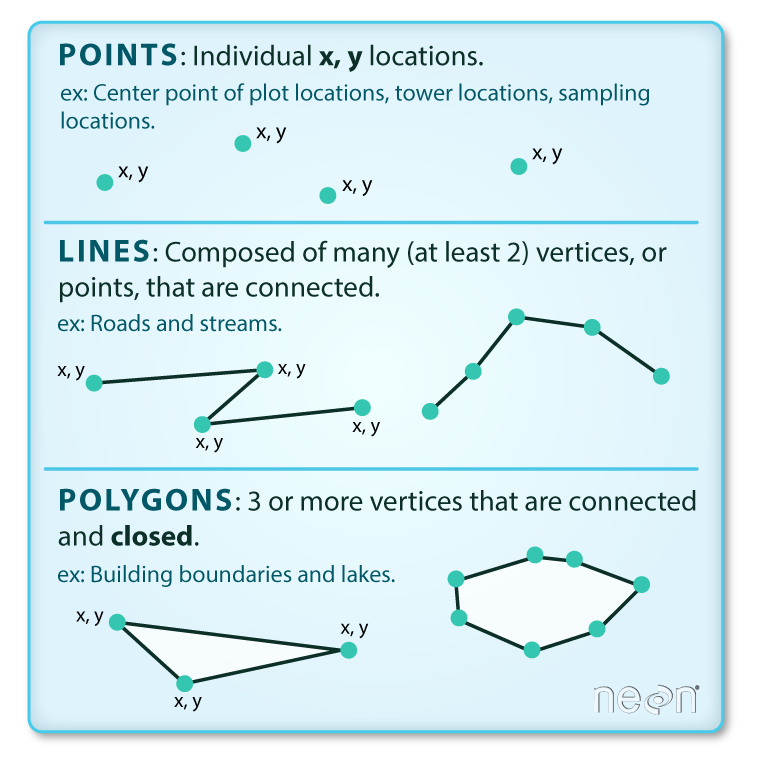

## A couple of terminology notes

- A **feature** refers to both the geometry and attributes of specific piece of vector data
- A **feature collection** is a list, or collection, of features

Both terms are very common in Python geospatial software.

## Common formats for vector datasets

## A shapefile

Actually several files with the same common prefix

Mandatory files: 

- **.shp**: the file containing the geometries
- **.shx**: the file that indexes the geometry
- **.dbf**: tabular data format storing the attributes for each geometry
    
And many optional files for documentation, projection information, etc.

Let's take a look at an example shapefile:

In [11]:
!ls data/ne_110m_admin_0_countries/

ne_110m_admin_0_countries.README.html ne_110m_admin_0_countries.prj
ne_110m_admin_0_countries.VERSION.txt ne_110m_admin_0_countries.shp
ne_110m_admin_0_countries.cpg         ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.dbf


## The GeoJSON file

- Stores simple features in a JSON format
- Arose due to the prevalence of the JSON format, especially on the web

<center>
    <img src=attachment:Screen%20Shot%202019-02-04%20at%2011.09.38%20PM.png width=500></img>
</center>
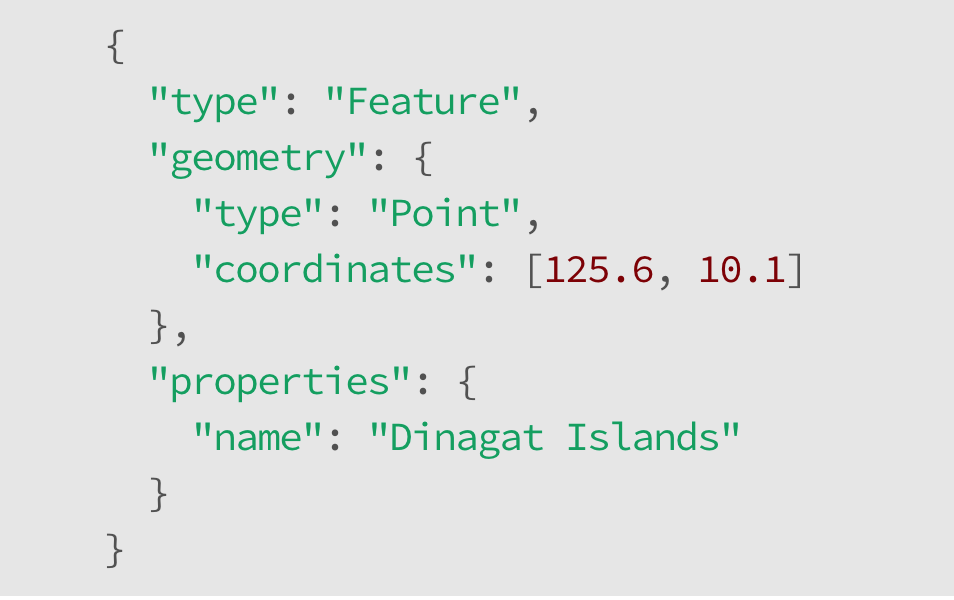

### Additional GeoJSON resources and tools:
- GitHub lets you view GeoJSON files natively 
- http://geojson.io provides interactive creation and viewing of small GeoJSON files

GitHub example from the `data/` directory: [Zipcodes.geojson](https://github.com/MUSA-620-Spring-2019/week-3/blob/master/data/Zipcodes_Poly.geojson)

## Reading Vector Data

`geopandas` provides a simple, intuitive for the main types of geospatial vector file formats

Let's load a shape file of countries in the world...

[Source: Natural Earth Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

In [20]:
import geopandas as gpd

We can use the `read_file()` function to read shapefiles and GeoJSON files.


There's also a `read_postgis` to read querys from PostGIS databases...more to come in future weeks.

In [73]:
# read the shape file, giving the name of the directory
countries = gpd.read_file("./data/ne_110m_admin_0_countries")

In [74]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...


In [30]:
type(countries)

geopandas.geodataframe.GeoDataFrame

## What's a `GeoDataFrame`?

Just like a `DataFrame` but with a `geometry` column

In [41]:
countries.geometry.iloc[:10]

0    POLYGON ((61.21081709172574 35.65007233330923,...
1    (POLYGON ((23.90415368011818 -11.7222815894063...
2    POLYGON ((21.0200403174764 40.84272695572588, ...
3    POLYGON ((51.57951867046327 24.24549713795111,...
4    (POLYGON ((-66.95992000000001 -54.896810000000...
5    POLYGON ((43.58274580259273 41.09214325618257,...
6    (POLYGON ((-59.57209469261159 -80.040178725096...
7    POLYGON ((68.935 -48.62500000000001, 69.58 -48...
8    (POLYGON ((145.3979781434949 -40.7925485166059...
9    POLYGON ((16.97966678230404 48.12349701597631,...
Name: geometry, dtype: object

## We can still leverage the power of `pandas`...

Calculate the total world population:

In [48]:
countries['pop_est'].sum()/1e9

7.383089462

Calculate the total population on each continent:

In [84]:
grouped = countries.groupby('continent')

grouped

#### Remember: the `groupby()` does not return a `DataFrame` — you need to call `sum()`, `mean()`, etc, or `apply()` a function

In [85]:
# sum population on each continent
pop_by_continent = grouped['pop_est'].sum()

# sort values
pop_by_continent.sort_values(ascending=False, inplace=True)

pop_by_continent

continent
Asia                       4.389145e+09
Africa                     1.219176e+09
Europe                     7.463985e+08
North America              5.730421e+08
South America              4.185407e+08
Oceania                    3.678284e+07
Antarctica                 4.050000e+03
Seven seas (open ocean)    1.400000e+02
Name: pop_est, dtype: float64

Filter the data frame based on a boolean selection:

In [59]:
is_USA = countries['name']=='United States of America'
USA = countries.loc[is_USA].squeeze()

USA

iso_a3                                                      USA
name                                   United States of America
continent                                         North America
pop_est                                             3.26626e+08
gdp_md_est                                            1.856e+07
geometry      (POLYGON ((-122.84 49.00000000000014, -120 49....
Name: 168, dtype: object

The simple features (Lines, Points, Polygons) are implemented by the [shapely](https://shapely.readthedocs.io/en/stable/manual.html) library

In [87]:
type(USA.geometry)

shapely.geometry.multipolygon.MultiPolygon

Jupyter notebook renders `shapely` geometries automatically:

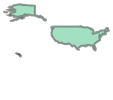

In [65]:
# a mini USA
USA.geometry

## How does `geopandas` handles coordinate systems and map projections?



## Coordinate Reference Systems

A **coordinate reference system** (CRS) relates the position of a geometry object on the spherical earth to its two-dimensional coordinates.

A `GeoDataFrame` or `GeoSeries` has a `.crs` attribute which specifies the coordinate reference system.

In [99]:
countries.crs

{'init': 'epsg:4326'}

- EPSG 4326 is known as WGS84 where `x` and `y` are longitude and latitude. 
- It is is the default coordinate system for GPS systems.
- It's also known as Plate Carrée

## How to plot all of the geometries at once?

Use the `plot()` function to get a quick and dirty plot of all of the geometry features.

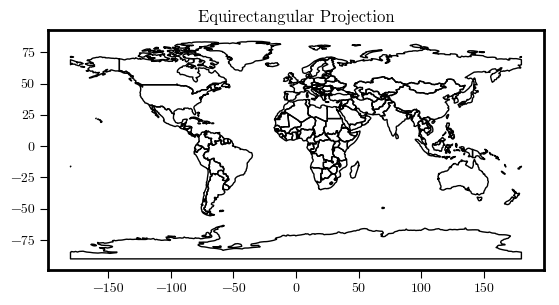

In [156]:
ax = countries.plot(facecolor='none', edgecolor='black')
title = ax.set_title('Equirectangular Projection')

<center>
    <img src=attachment:platecarree.png width=500></img>
</center>
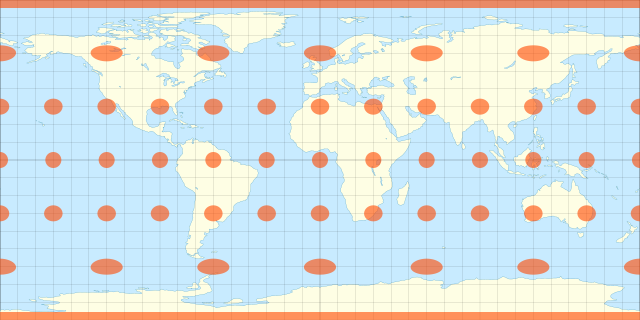

## What's going on under the hood?

`matplotlib` and `cartopy` are combined to make geo-aware plots

In [107]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

<class 'cartopy.mpl.geoaxes.GeoAxesSubplot'>


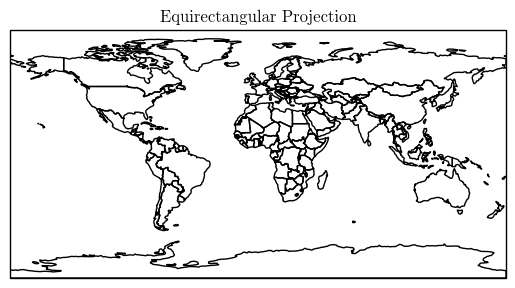

In [155]:
# initialize the CRS object
wgs84 = ccrs.PlateCarree()

# create a geo-aware axes
ax = plt.axes(projection=wgs84)

print(type(ax))
     
# add the geometry shapes
ax.add_geometries(countries['geometry'], crs=wgs84, facecolor='none', edgecolor='black')

# add a title
title = ax.set_title('Equirectangular Projection')

See the [geopandas documentation](https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html) for more examples.

## Can we convert to other geometries?

Use the `to_crs()` function. The most well-known projections can be specified by their EPSG code:

## Let's convert to the Mercator projection

[EPSG code: 3395](http://spatialreference.org/ref/epsg/wgs-84-world-mercator/)

In [129]:
# remove Antartica, as the Mercator projection cannot deal with the poles
no_antartica = countries[(countries['name'] != "Antarctica")]

In [128]:
countries_mercator = no_antartica.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

In [133]:
countries_mercator.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((6813956.989691116 4227673.561898688,..."
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((2660998.215514913 -1305442.80953558...
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((2339940.184595554 4961221.198709426,..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((5741805.753758118 2765811.384651245,..."
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-7453944.197958336 -7306880.7041374...


## The easy way...

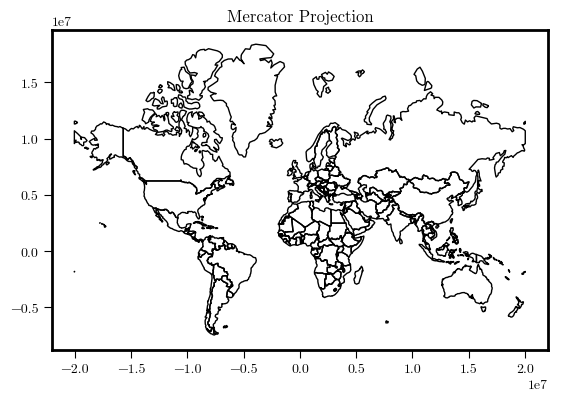

In [134]:
ax = countries_mercator.plot(facecolor='none', edgecolor='black')
title = ax.set_title('Mercator Projection')

## The harder way...

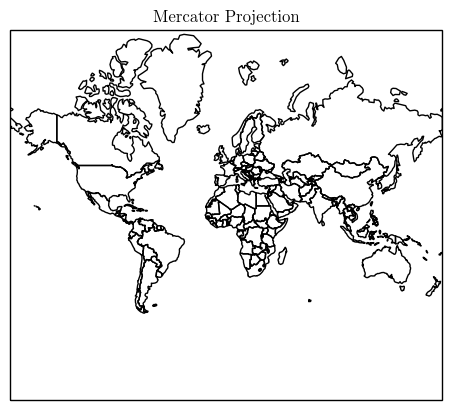

In [141]:
# initialize the CRS object
crs = ccrs.epsg(3395) # or crs = ccrs.Mercator()

# create a geo-aware axes
ax = plt.axes(projection=crs)

# add the geometry shapes
ax.add_geometries(countries_mercator['geometry'], crs=crs, facecolor='none', edgecolor='black')

# add a title
title = ax.set_title('Mercator Projection')

<center>
    <img src=attachment:mercator.png width=500></img>
</center>
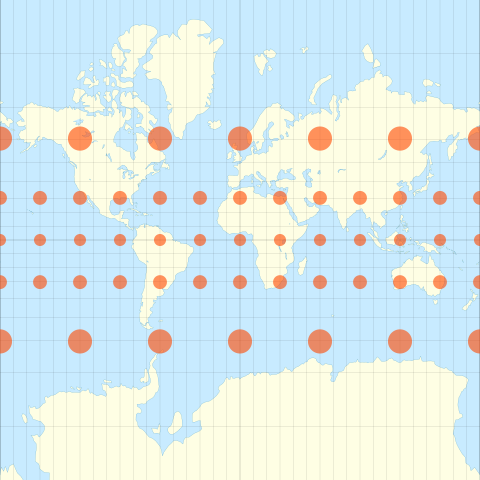

## When to use the 'harder' way?

When you need more customizable, advanced plots.

Nearly anything that `matplotlib` can do can be plotted on a `cartopy` `GeoAxes`. Plotting directly with `matplotlib` allows you to take full advantage of `matplotlib`'s functionality.

### More on this later...

## So which CRS is best?

- For city-based data, usually Web Mercator ([EPSG=3857](https://epsg.io/3857)) is best
- Can also use a CRS specific to individual states, e.g., [PA State Plane EPSG=2272](https://epsg.io/2272)

## Let's load the city limits for Philadelphia

In [159]:
city_limits = gpd.read_file('./data/City_Limits')

city_limits

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-75.01496742025201 40.1379348411103,..."


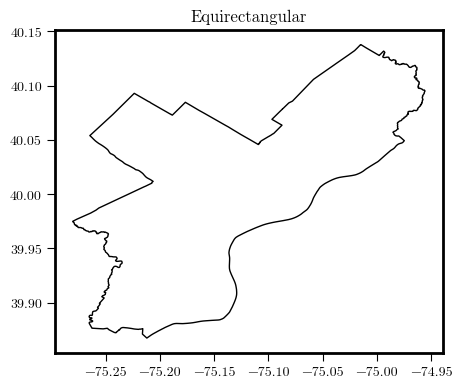

In [160]:
# equirectangular (plate carree)
ax = city_limits.to_crs(epsg=4326).plot(facecolor='none', edgecolor='black')
ax.set_title('Equirectangular')
ax.figure.set_size_inches((5, 5))

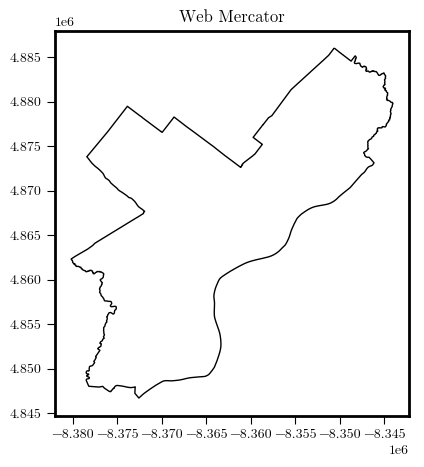

In [161]:
# web mercator plot
ax = city_limits.to_crs(epsg=3857).plot(facecolor='none', edgecolor='black')
ax.set_title('Web Mercator')
ax.figure.set_size_inches((5, 5))

**Important:** the equirectangular CRS (EPSG=4326) is often used by default and will make cities appear wider and flatter than they really are 

## Saving GeoDataFrames


Use the `to_file()` function and specify the driver.

In [162]:
city_limits_mercator = city_limits.to_crs(epsg=3857)

In [163]:
city_limits_mercator.to_file?

In [199]:
# ESRI shape file
city_limits_mercator.to_file("./data/city_limits_mercator", driver='ESRI Shapefile')

/Users/nhand/anaconda/envs/musa/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [166]:
# GeoJSON is also an option
city_limits_mercator.to_file("./data/city_limits_mercator.geojson", driver='GeoJSON')

/Users/nhand/anaconda/envs/musa/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


## How about as a CSV file?

Yes, but reading requires more work...

In [203]:
# save a csv file
city_limits_mercator.to_csv("./data/city_limits_mercator.csv", index=False)

In [204]:
import pandas as pd

In [207]:
df = pd.read_csv("./data/city_limits_mercator.csv")
df.head()

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-8350627.97509646 4886006.88680784, ..."


In [208]:
type(df.geometry.iloc[0])

str

## Use `shapely` to parse the string version of the polygons

In [209]:
from shapely import wkt

# wkt.loads will convert from string to Polygon object
df['geometry'] = df['geometry'].apply(wkt.loads)

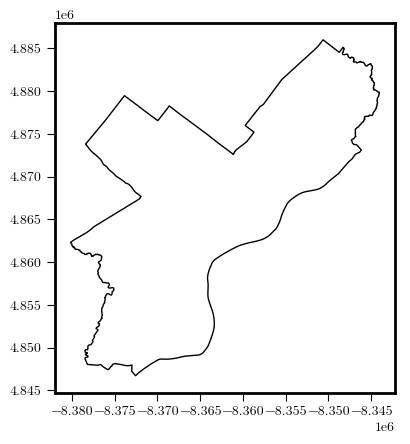

In [210]:
# make the GeoDataFrame, specifying the name of the geometry column
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.plot(facecolor='none', edgecolor='black')

## So, when should you use GeoPandas?

- For exploratory data analysis and visualization, including in Jupyter notebooks
- Pre-processing data to be fed into a desktop GIS program
- For compact, readable, and reproducible code
- If you’re comfortable with Pandas and/or R data frames.

## When it may not be the best tool:

- For polished multilayer map creation — one option is to use a desktop GIS like QGIS.
- If you need very high performance — geopandas can be slow compared to other GIS software.

## Spatial Relationships and Joins

In [332]:
# load some cities data
cities = gpd.read_file("./data/ne_110m_populated_places")

<center>
    <img src=attachment:TopologicSpatialRelarions2.png width=600></img>
</center>

(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))
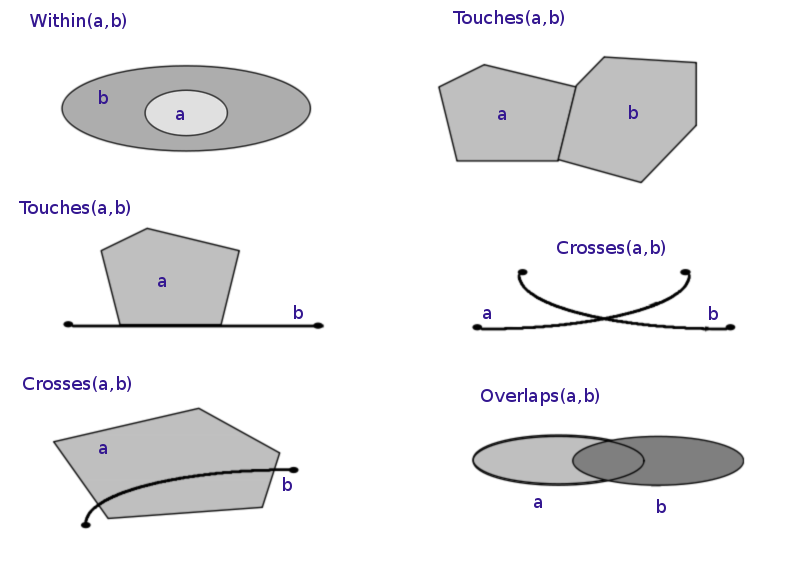

All of these operations are available as functions of a `GeoDataFrame`.

## A quick example

What country is [**insert your favorite city**] in?

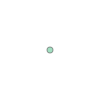

In [274]:
# select the Point representing New York City
new_york = cities.loc[cities['name'] == 'New York', 'geometry'].squeeze()
new_york

In [275]:
# find the country that contains New York
countries.loc[countries.contains(new_york)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"(POLYGON ((-122.84 49.00000000000014, -120 49...."


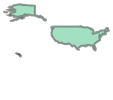

In [276]:
# save the USA polygon
USA = countries.loc[countries.contains(new_york), 'geometry'].squeeze()
USA

In [277]:
# is New York within the USA?
new_york.within(USA)

True

#### Reference

The different functions for checking spatial relationships:

- `equals`
- `contains`
- `crosses`
- `disjoint`
- `intersects`

- `overlaps`
- `touches`
- `within`
- `covers`

See [the shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships) for an overview of these methods.

## Spatial join operation


**SPATIAL JOIN** = merging attributes from two geometry layers based on their spatial relationship

Different parts of this operations:

- The GeoDataFrame to which we want add information
- The GeoDataFrame that contains the information we want to add
- The spatial relationship we want to use to match both datasets (**intersects**, **contains**, **within**)
- The type of join: **left** or **inner** join

In this case, we want to join the `cities` dataframe, containing `Point` geometries, with the information of the `countries` dataframe, containing `Polygon` geometries.

To match cities with countries, we'll use the `within` spatial relationship.

The [`geopandas.sjoin()`](http://geopandas.readthedocs.io/en/latest/reference/geopandas.sjoin.html) function performs this operation:

In [284]:
joined = gpd.sjoin(cities, countries, op='within', how='left')

In [285]:
joined.head()

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177015780014 43.936095834768),79.0,ITA,Italy,Europe,62137802.0,2221000.0
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9.0,AUT,Austria,Europe,8754413.0,416600.0
3,Lobamba,POINT (31.19999710971274 -26.46666746135247),152.0,SWZ,Swaziland,Africa,1467152.0,11060.0
4,Luxembourg,POINT (6.130002806227083 49.61166037912108),97.0,LUX,Luxembourg,Europe,594130.0,58740.0


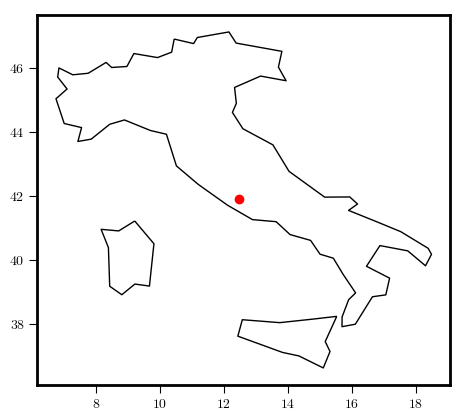

In [316]:
# find and plot italy
italy = countries.loc[countries['name']=='Italy']
ax = italy.plot(facecolor='none', edgecolor='black')

# plot the first city in the joined data frame (Vatican City)
# use the same axes!
ax = joined.iloc[:1].plot(ax=ax, color='red')

## Spatial overlay operation

We can also perform the `join()` operation on the **geometries** rather than just combining **attributes**.

The `overlay()` function combines geometries, e.g. by taking the intersection of the geometries)

In [333]:
africa = countries[countries['continent'] == 'Africa']

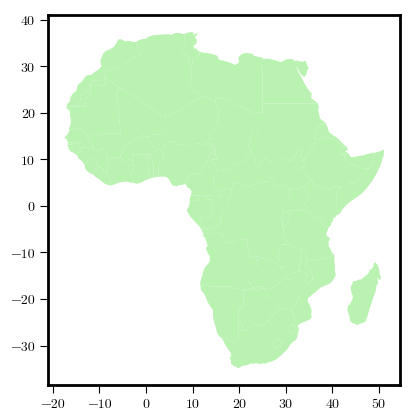

In [334]:
africa.plot(facecolor='#b9f2b1')

In [340]:
# add a buffer region (2 degrees) around all cities
buffered_cities = cities.copy()
buffered_cities['geometry'] = buffered_cities.buffer(2)

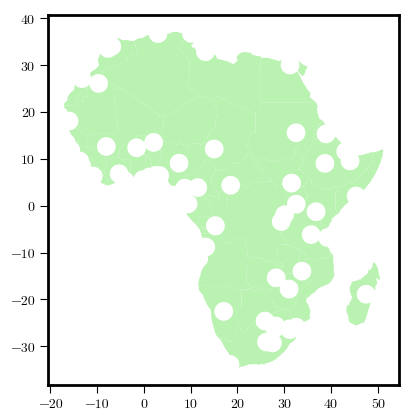

In [337]:
# the difference of the geometry sets
gpd.overlay(africa, buffered_cities, how='difference').plot(facecolor="#b9f2b1")

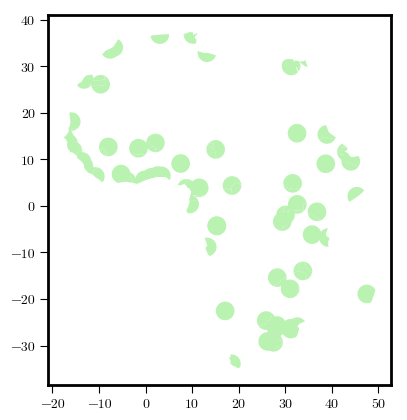

In [341]:
# the intersection of the geometry sets
gpd.overlay(africa, buffered_cities, how='intersection').plot(facecolor="#b9f2b1")

### Recap:

- **Spatial join**: merge attributes from one data frame to another based on the spatial relationship
- **Spatial overlay**: creating new geometries based on spatial operation between both data frames (and combining attributes of both data frames)

## Putting it all together: 311 requests in 2018

Load 311 requests in Philadelphia from the `data/` directory.

Source: [OpenDataPhilly](https://www.opendataphilly.org/dataset/311-service-and-information-requests)

In [359]:
# load the data from a CSV file
requests = pd.read_csv('./data/public_cases_fc_2018.csv')

In [360]:
print("number of requests = ", len(requests))

number of requests =  609224


In [361]:
requests.head()

,lat,lon,status,service_name,agency_responsible,requested_datetime,updated_datetime,expected_datetime
0,NaN,NaN,Closed,Information Request,Managing Director's Office- MDO,2018-02-12 17:01:36,2018-02-12 17:01:46,2018-02-12 17:30:13
1,NaN,NaN,Closed,Information Request,Philly311 Contact Center,2018-02-09 18:34:34,2018-02-09 18:34:48,2018-02-09 19:00:39
2,39.952620,-75.177824,Closed,Illegal Dumping,Streets Department,2018-04-04 11:43:19,2018-04-10 06:31:12,2018-04-10 20:00:00
3,NaN,NaN,Closed,Information Request,Department of Records,2018-02-13 12:02:13,2018-02-13 12:02:26,2018-02-13 12:30:15
4,39.941155,-75.181570,Closed,Rubbish/Recyclable Material Collection,Streets Department,2018-04-02 17:14:38,2018-04-10 06:31:13,2018-04-04 20:00:00


## First, convert to a GeoDataFrame

Remove the requests missing lat/lon coordinates

In [362]:
requests = requests.dropna(subset=['lat', 'lon'])

Create a list of (x,y) tuples and convert to Point objects:

In [590]:
requests['Coordinates'] = list(zip(requests['lon'], requests['lat']))

In [591]:
from shapely.geometry import Point
requests['Coordinates'] = requests['Coordinates'].apply(Point)

Now, convert to a GeoDataFrame.

**Don't forget to set the CRS manually!**

In [592]:
requests = gpd.GeoDataFrame(requests, geometry='Coordinates', 
                            crs={'init': 'epsg:4326'})

## Next, identify the top 20 most common requests

Group by the service name and calculate the size of each group:

In [593]:
service_types = requests.groupby('service_name').size()

Sort by the number (in descending order):

In [594]:
service_types = service_types.sort_values(ascending=False)

Slice the data to take the first 20 elements:

In [595]:
top20 = service_types.iloc[:20]
top20

service_name
Maintenance Residential or Commercial     28615
Rubbish/Recyclable Material Collection    25837
Street Defect                             25148
Illegal Dumping                           24653
Abandoned Vehicle                         20722
Graffiti Removal                          18136
Street Light Outage                       12465
Vacant Lot Clean-Up                        9269
LI Escalation                              7697
Vacant House or Commercial                 6932
Information Request                        6429
Sanitation / Dumpster Violation            5250
Street Trees                               4527
Building Force                             4513
Traffic Signal Emergency                   4457
Other (Streets)                            4123
Smoke Detector                             3552
Building Construction                      3266
Building Dangerous                         2589
Alley Light Outage                         2147
dtype: int64

## Let's trim to only the 'Street Defects'

In [606]:
potholes = requests.loc[requests['service_name']=='Street Defect']
potholes = potholes.to_crs(epsg=3857)
print('number of potholes = ', len(potholes))

number of potholes =  25148


## Calculate statistics by Zillow neighborhood

A GeoJSON holding Zillow definitions for Philadelphia neighborhoods is available in the `data/` directory. 

Source: https://www.zillow.com/howto/api/neighborhood-boundaries.htm

In [607]:
zillow = gpd.read_file('data/zillow_neighborhoods.geojson')
zillow = zillow.to_crs(epsg=3857)

In [608]:
zillow.head()

,ZillowName,geometry
0,Academy Gardens,POLYGON ((-8348795.676844054 4875297.327437357...
1,Airport,POLYGON ((-8370923.380392455 4850336.405079939...
2,Allegheny West,POLYGON ((-8367432.106275852 4866417.819736992...
3,Andorra,POLYGON ((-8373967.120433775 4875663.023801578...
4,Aston Woodbridge,POLYGON ((-8349918.769724508 4873746.906470324...


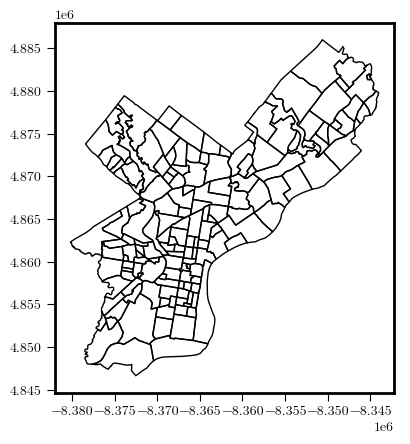

In [609]:
zillow.plot(facecolor='none', edgecolor='black')

### Goal: for each neighborhood, calculate the number of potholes

Use the `sjoin()` function to match point data (requests) to polygon data (neighborhoods)

In [610]:
joined = gpd.sjoin(potholes, zillow, op='within', how='left')

Note that this operation can be **slow**

Group by neighborhood and calculate the size:

In [612]:
totals = joined.groupby('ZillowName').size()
type(totals)

pandas.core.series.Series

Convert to a data frame, and name the column.

**Also, reset the index so ZillowName is a column again**

In [613]:
totals = totals.to_frame('N').reset_index()
totals.head()

,ZillowName,N
0,Academy Gardens,58
1,Airport,11
2,Allegheny West,123
3,Andorra,5
4,Aston Woodbridge,44


Lastly, merge the total per neighborhood with the polygon geometries:

In [614]:
totals = pd.merge(zillow, totals, on='ZillowName')

## Visualize as a choropleth map

First, plot the total number of requests per neighborhood.

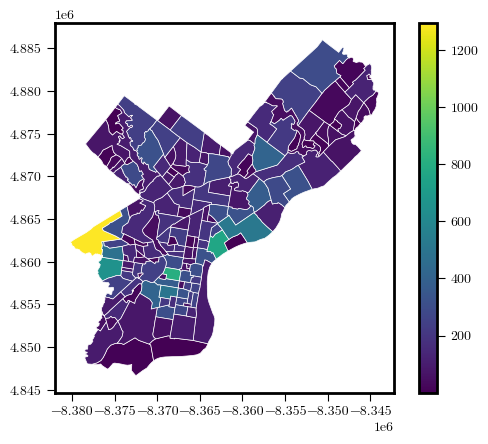

In [617]:
totals.plot(column='N', edgecolor='white', 
            linewidth=0.5, legend=True)

## What's the problem with this?

Better to normalize by area: **use the .area attribute of the geometry series**

In [619]:
totals['N_per_area'] = totals['N'] / (totals.geometry.area)

Now plot the normalized totals:

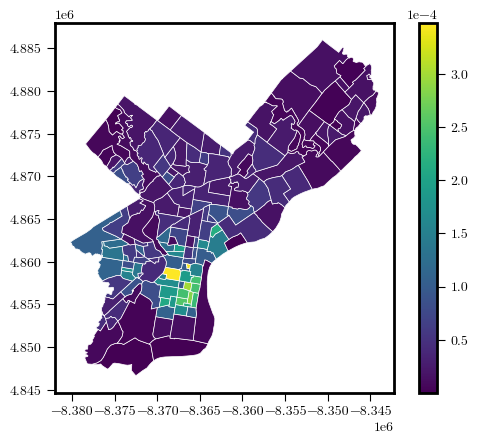

In [623]:
Y.plot(column='N_per_area', edgecolor='white', 
       linewidth=0.5, legend=True)

## More advanced: hex bins

Hexagonal bins aggregate quantities over small spatial regions and are becoming increasingly popular.

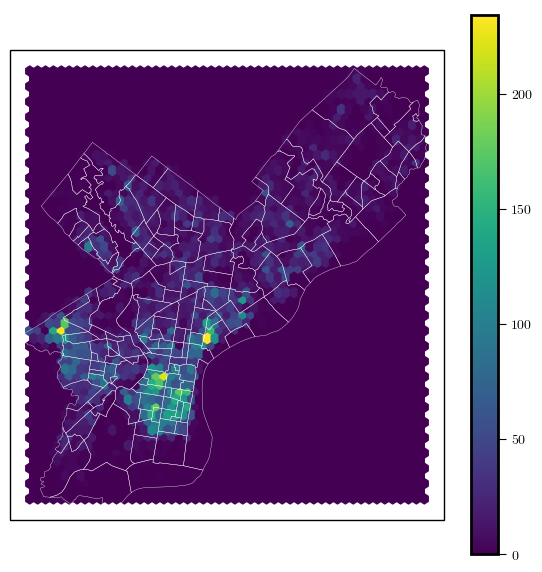

In [670]:
# create the axes
crs = ccrs.epsg('3857') # web mercator
ax = plt.axes(projection=crs)

# use the .x and .y attributes
vals = ax.hexbin(potholes.geometry.x, potholes.geometry.y, gridsize=50)

# add the zillow geometry boundaries
ax.add_geometries(zillow.geometry, crs=crs, facecolor='none', 
                  edgecolor='white', linewidth=0.25)

# adjust the figure size
ax.figure.set_size_inches((7,7))

# add a colorbar
plt.colorbar(vals)

## Can we do better?

Yes! Let's add interactivity. We'll start with `altair`...

In [631]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

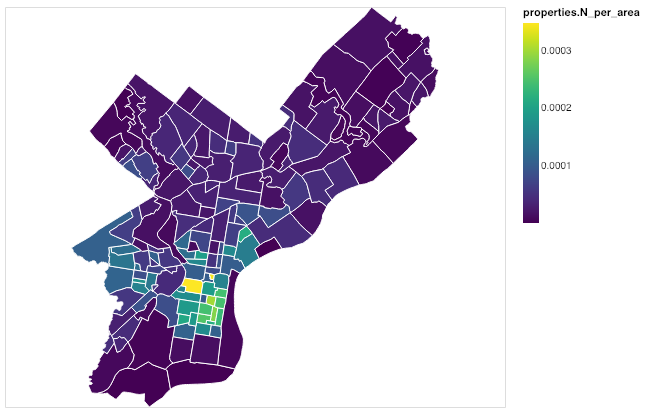

In [633]:
# create an altair data source from a GeoJSON representation
data  = alt.InlineData(values=totals.to_crs(epsg=4326).to_json(),
                       format=alt.DataFormat(property='features',type='json'))

# plot map, where variables ares nested within `properties`, 
alt.Chart(data).mark_geoshape(
    stroke='white',
).properties(
    width=500,
    height=400,
    projection={"type":'mercator'},
).encode(
    tooltip=['properties.N_per_area:Q', 'properties.ZillowName:N'],
    color='properties.N_per_area:Q'
)

**Challenge:** use altair's *repeated charts* to show several choropleths for different 311 request types at once.

A similar example (using a different dataset) is available in the [altair gallery](https://altair-viz.github.io/gallery/choropleth_repeat.html).

## Exercise: property assessments in Philadelphia

**Goals**: 
- visualize the property assessment values by neighborhood in Philadelphia, using a
    - static choropleth map
    - hex bin map
    - interactive choropleth with altair

## Dataset

2019 property assessment data:
- from [OpenDataPhilly](https://www.opendataphilly.org/dataset/opa-property-assessments)
- residential properties only — over 460,000 properties 

## Step 1: Load the assessment data

In [637]:
data = pd.read_csv('./data/opa_residential.csv')
data.head()

,parcel_number,lat,lng,location,market_value,building_value,land_value,total_land_area,total_livable_area
0,71361800,39.991575,-75.128994,2726 A ST,62200.0,44473.0,17727.0,1109.69,1638.0
1,71362100,39.991702,-75.128978,2732 A ST,25200.0,18018.0,7182.0,1109.69,1638.0
2,71362200,39.991744,-75.128971,2734 A ST,62200.0,44473.0,17727.0,1109.69,1638.0
3,71362600,39.991994,-75.128895,2742 A ST,15500.0,11083.0,4417.0,1109.69,1638.0
4,71363800,39.992592,-75.128743,2814 A ST,31300.0,22400.0,8900.0,643.50,890.0


We'll focus on the `market_value` column for this analysis

## Step 2: convert to a GeoDataFrame

In [640]:
data['Coordinates'] = list(zip(data['lng'], data['lat']))
data['Coordinates'] = data['Coordinates'].apply(Point)
data = gpd.GeoDataFrame(data, geometry='Coordinates', 
                            crs={'init': 'epsg:4326'})

data = data.to_crs(epsg=3857)

In [641]:
len(data)

461460

## Step 3: do a spatial join with Zillow neighbohoods



In [663]:
gdata = gpd.sjoin(data, zillow, op='within', how='left')

## Step 4: make a choropleth of the median market value by neighborhood

Hints: 
- you will need to group by Zillow neighborhood
- calculate the median market value per neighborhood
- join with the Zillow neighborhood GeoDataFrame

In [659]:
median_values = gdata.groupby('ZillowName')['market_value'].median().reset_index()

In [660]:
median_values = pd.merge(zillow, median_values, on='ZillowName')
median_values['market_value'] /= 1e3 # in thousands

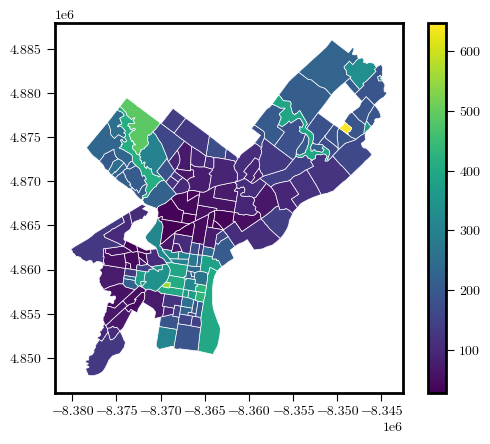

In [661]:
median_values.plot(column='market_value', 
                   edgecolor='white',
            linewidth=0.5, legend=True)

In [704]:
plt.hexbin?

## Step 5: make a hex bin map of median assessments

Hints: 
- You will need to use the `C` and `reduce_C_function` of the `hexbin()` function
- Run `plt.hexbin?` for more help
- Try testing the impact of setting `bins='log'` on the resulting map

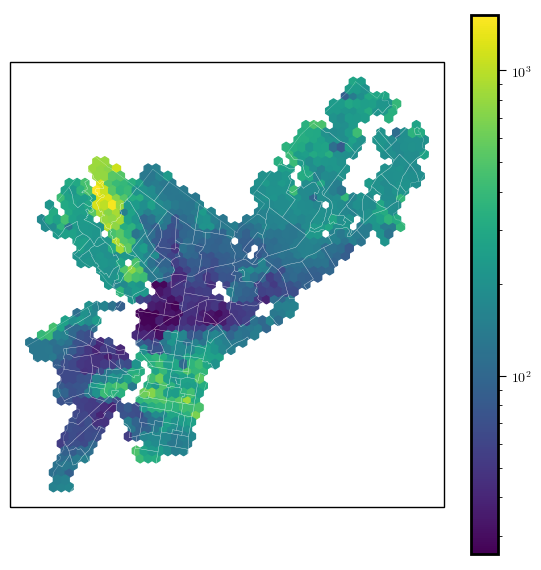

In [705]:
# create the axes
crs = ccrs.epsg('3857') # web mercator
ax = plt.axes(projection=crs)

# use the .x and .y attributes
vals = ax.hexbin(gdata.geometry.x, gdata.geometry.y, 
          C=gdata.market_value/1e3, 
          reduce_C_function=np.median,
          bins='log',
          gridsize=50)

# add the zillow geometry boundaries
ax.add_geometries(zillow.geometry, crs=crs, facecolor='none', 
                  edgecolor='white', linewidth=0.25, alpha=0.5)

# adjust the figure size
ax.figure.set_size_inches((7,7))

# add a legend
plt.colorbar(vals)

## Step 6: Use altair to make an interactive choropleth

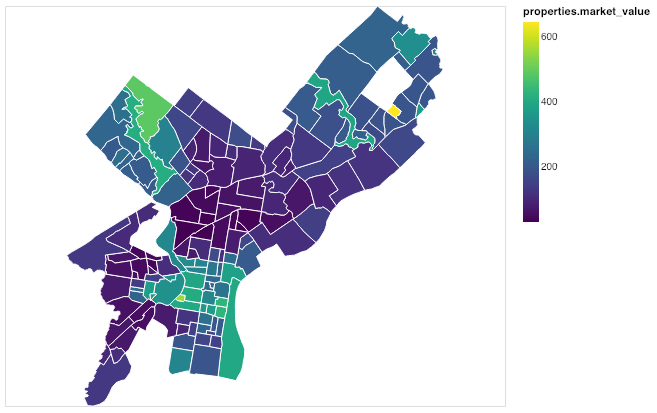

In [671]:
# create an altair data source from a GeoJSON representation
data  = alt.InlineData(values=median_values.to_crs(epsg=4326).to_json(),
                       format=alt.DataFormat(property='features',type='json'))

# plot map, where variables ares nested within `properties`, 
alt.Chart(data).mark_geoshape(
    stroke='white',
).properties(
    width=500,
    height=400,
    projection={"type":'mercator'},
).encode(
    tooltip=['properties.market_value:Q', 'properties.ZillowName:N'],
    color='properties.market_value:Q'
)